In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
energy_data = pd.read_csv('energy_dataset.csv')

In [3]:
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
energy_data.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [5]:
energy_data.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [6]:
energy_data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [7]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [8]:
energy_data.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [9]:
energy_data.shape

(35064, 29)

In [10]:
energy_data.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [11]:
energy_data = energy_data.drop(['generation hydro pumped storage aggregated','forecast wind offshore eday ahead'],axis=1)

In [12]:
energy_data = energy_data.dropna()

In [13]:
energy_data.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [14]:
energy_data.nunique()

time                                           35017
generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8293
generation fossil hard coal                     7265
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                              

In [15]:
energy_data= energy_data.drop(['time'],axis =1)

In [16]:
round((energy_data.isnull().sum()/len(energy_data)*100),2)

generation biomass                             0.0
generation fossil brown coal/lignite           0.0
generation fossil coal-derived gas             0.0
generation fossil gas                          0.0
generation fossil hard coal                    0.0
generation fossil oil                          0.0
generation fossil oil shale                    0.0
generation fossil peat                         0.0
generation geothermal                          0.0
generation hydro pumped storage consumption    0.0
generation hydro run-of-river and poundage     0.0
generation hydro water reservoir               0.0
generation marine                              0.0
generation nuclear                             0.0
generation other                               0.0
generation other renewable                     0.0
generation solar                               0.0
generation waste                               0.0
generation wind offshore                       0.0
generation wind onshore        

In [17]:
energy_data.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.229608,NaN,-0.021187,0.433113,0.458499,NaN,NaN,NaN,-0.044836,...,-0.005010,-0.348220,NaN,-0.069010,-0.008692,-0.072183,0.085351,0.083211,0.108867,0.142799
generation fossil brown coal/lignite,0.229608,1.000000,NaN,0.500119,0.768905,0.314732,NaN,NaN,NaN,-0.323907,...,0.040535,0.282625,NaN,-0.434509,0.042471,-0.436250,0.278777,0.280531,0.568146,0.364206
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,-0.021187,0.500119,NaN,1.000000,0.542141,0.310711,NaN,NaN,NaN,-0.420602,...,0.074938,0.276167,NaN,-0.397280,0.080235,-0.397565,0.543711,0.548947,0.640889,0.461918
generation fossil hard coal,0.433113,0.768905,NaN,0.542141,1.000000,0.440374,NaN,NaN,NaN,-0.406085,...,0.046091,0.170160,NaN,-0.442063,0.047454,-0.444425,0.394443,0.396637,0.671667,0.466703
generation fossil oil,0.458499,0.314732,NaN,0.310711,0.440374,1.000000,NaN,NaN,NaN,-0.331405,...,0.099879,-0.177810,NaN,-0.052254,0.096547,-0.058051,0.499435,0.497069,0.293068,0.285351
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation hydro pumped storage consumption,-0.044836,-0.323907,NaN,-0.420602,-0.406085,-0.331405,NaN,NaN,NaN,1.000000,...,-0.214677,-0.188762,NaN,0.389000,-0.222111,0.390459,-0.559710,-0.562790,-0.600351,-0.427032


In [18]:
correlations = energy_data.corr(method='pearson')

In [19]:
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.733508
generation fossil hard coal                    0.466703
generation fossil gas                          0.461918
total load forecast                            0.436235
total load actual                              0.435873
generation fossil brown coal/lignite           0.364206
generation fossil oil                          0.285351
generation other renewable                     0.256398
generation waste                               0.169290
generation biomass                             0.142799
forecast solar day ahead                       0.101463
generation other                               0.099759
generation solar                               0.098774
generation hydro water reservoir               0.072210
generation nuclear                            -0.051817
generation hydro run-of-river and poundage    -0.136752
generation wind onshore                       -0

In [20]:
null_val_cols = ['generation marine',
                'generation geothermal',
                'generation fossil peat',
                'generation wind offshore',
                'generation fossil oil shale',
                'generation fossil coal-derived gas']

In [21]:
heat_map_features = energy_data.drop(columns=null_val_cols,axis=1)

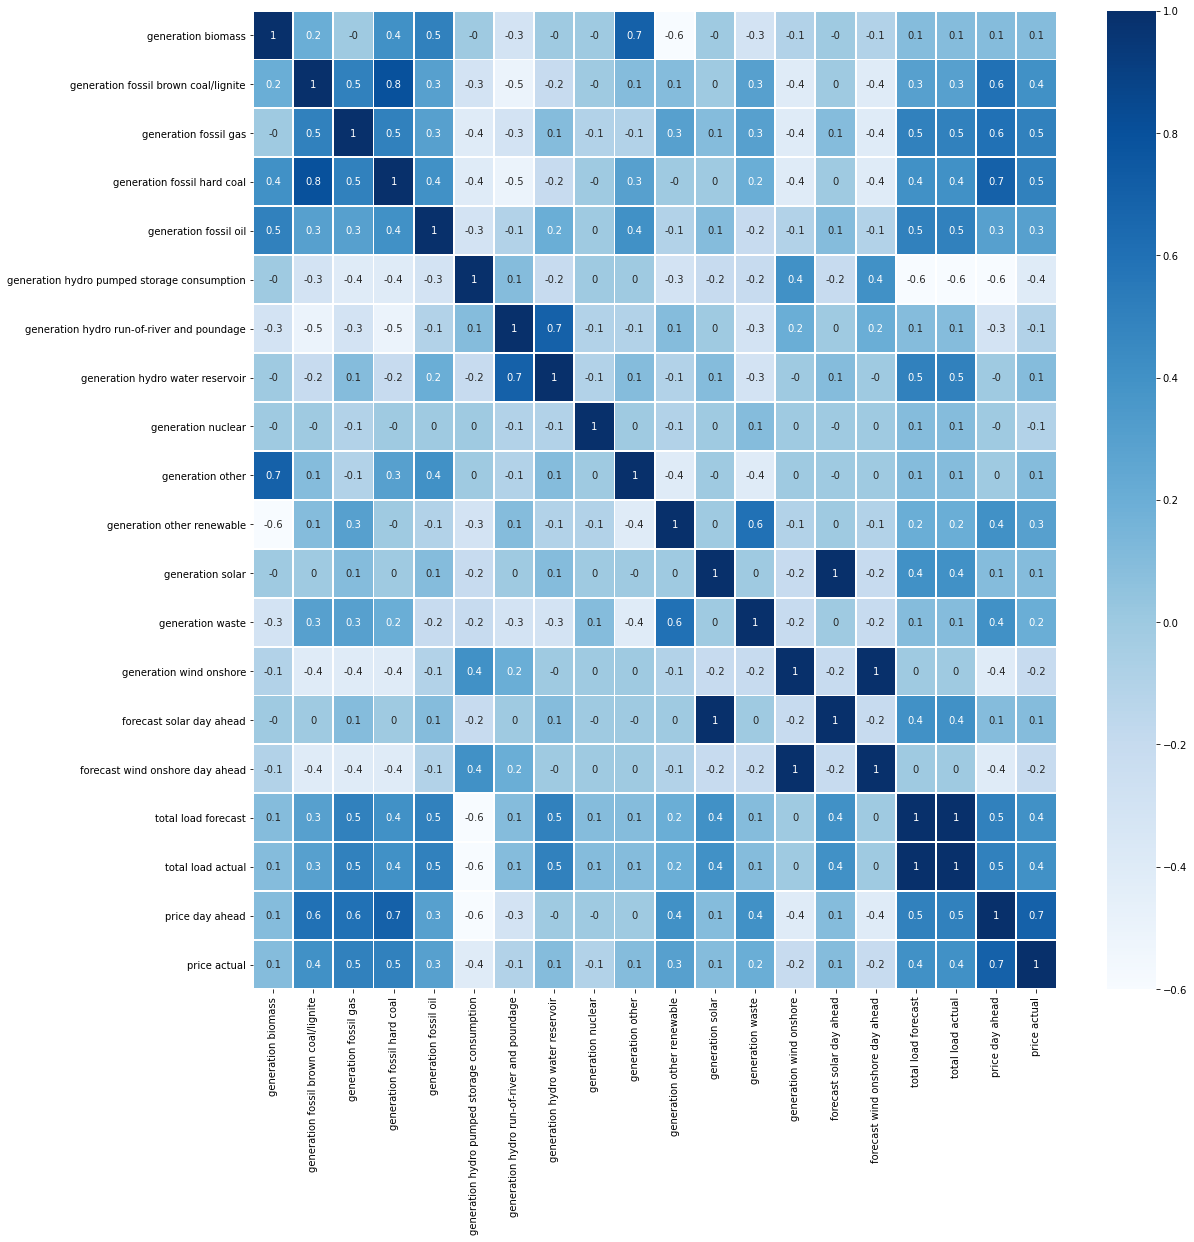

In [22]:
plt.figure(figsize=(18,18))
sns.heatmap(round(heat_map_features.corr(),1),annot=True,cmap='Blues',linewidth=0.9)

plt.show()

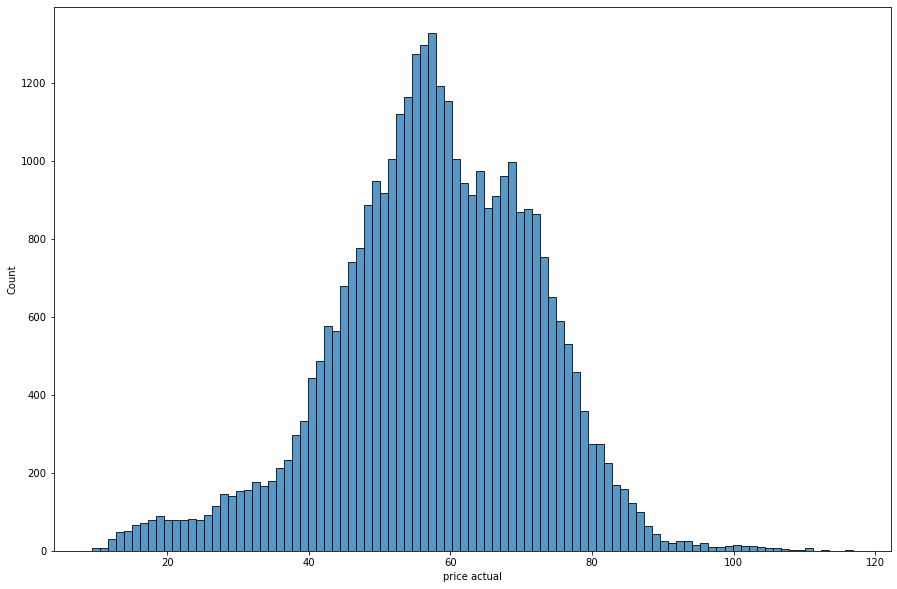

In [23]:
plt.figure(figsize=(15,10))
sns.histplot(energy_data,x= 'price actual')
plt.show()

<AxesSubplot:xlabel='total load actual', ylabel='price actual'>

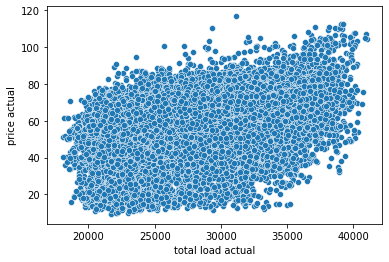

In [24]:
sns.scatterplot(x='total load actual',y = 'price actual',data = energy_data)

In [25]:
X = energy_data.drop(['price actual'], axis=1)
y = energy_data['price actual']

In [26]:
X

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
0,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,73.0,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10
1,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,71.0,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10
2,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,73.0,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33
3,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,75.0,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27
4,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,74.0,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,1.0,...,95.0,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85
35060,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,1.0,...,95.0,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40
35061,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,50.0,...,94.0,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88
35062,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,108.0,...,93.0,31.0,287.0,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93


In [27]:
y

0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: price actual, Length: 35017, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [30]:
X_train

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
14040,319.0,0.0,0.0,3551.0,1792.0,217.0,0.0,0.0,0.0,970.0,...,78.0,647.0,307.0,0.0,7812.0,647.0,7890.0,24327.0,24097.0,33.00
30504,371.0,0.0,0.0,5355.0,3054.0,237.0,0.0,0.0,0.0,37.0,...,87.0,272.0,310.0,0.0,3934.0,517.0,3976.0,24726.0,24549.0,59.46
13579,325.0,904.0,0.0,7260.0,6394.0,320.0,0.0,0.0,0.0,0.0,...,76.0,520.0,322.0,0.0,5711.0,1199.0,5815.0,34278.0,34035.0,43.60
147,495.0,875.0,0.0,4157.0,7837.0,360.0,0.0,0.0,0.0,747.0,...,56.0,1223.0,220.0,0.0,5127.0,551.0,5232.0,26076.0,26248.0,48.50
12713,306.0,0.0,0.0,5311.0,1770.0,298.0,0.0,0.0,0.0,953.0,...,74.0,3981.0,235.0,0.0,11961.0,3857.0,11775.0,32517.0,33552.0,32.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13417,365.0,0.0,0.0,4933.0,3253.0,293.0,0.0,0.0,0.0,740.0,...,76.0,693.0,307.0,0.0,6656.0,656.0,6693.0,25947.0,26269.0,31.79
11232,220.0,0.0,0.0,3664.0,1582.0,252.0,0.0,0.0,0.0,1083.0,...,74.0,154.0,212.0,0.0,7101.0,100.0,7078.0,24691.0,24664.0,19.50
24219,356.0,569.0,0.0,4925.0,5170.0,282.0,0.0,0.0,0.0,0.0,...,102.0,123.0,307.0,0.0,1817.0,146.0,1849.0,23569.0,23310.0,50.50
26309,278.0,0.0,0.0,3334.0,1054.0,191.0,0.0,0.0,0.0,2544.0,...,77.0,9.0,238.0,0.0,6172.0,4.0,6376.0,19179.0,18688.0,2.06


In [31]:
X_test

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
9959,537.0,0.0,0.0,5107.0,4747.0,341.0,0.0,0.0,0.0,88.0,...,81.0,89.0,211.0,0.0,3031.0,81.0,3078.0,31158.0,30856.0,34.50
6876,550.0,217.0,0.0,4998.0,5774.0,212.0,0.0,0.0,0.0,0.0,...,67.0,4095.0,209.0,0.0,7304.0,4155.0,7415.0,31347.0,30999.0,53.91
8264,533.0,634.0,0.0,6694.0,7418.0,389.0,0.0,0.0,0.0,566.0,...,73.0,407.0,285.0,0.0,1846.0,464.0,1822.0,29717.0,30057.0,60.12
12237,347.0,196.0,0.0,4996.0,1759.0,304.0,0.0,0.0,0.0,0.0,...,84.0,477.0,224.0,0.0,5176.0,513.0,5379.0,29255.0,29409.0,32.00
24168,279.0,7.0,0.0,4943.0,2438.0,266.0,0.0,0.0,0.0,799.0,...,95.0,597.0,281.0,0.0,4969.0,594.0,5139.0,21943.0,22172.0,37.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,325.0,900.0,0.0,8109.0,5786.0,290.0,0.0,0.0,0.0,0.0,...,89.0,3121.0,291.0,0.0,7428.0,2985.0,7420.0,33416.0,33042.0,61.75
26282,283.0,0.0,0.0,3791.0,890.0,175.0,0.0,0.0,0.0,2197.0,...,78.0,9.0,257.0,0.0,7344.0,27.0,7354.0,21028.0,20799.0,9.80
10950,414.0,0.0,0.0,3780.0,1363.0,289.0,0.0,0.0,0.0,115.0,...,61.0,23.0,129.0,0.0,10585.0,1.0,10854.0,26296.0,25826.0,31.44
8830,483.0,0.0,0.0,3735.0,2293.0,317.0,0.0,0.0,0.0,0.0,...,79.0,576.0,210.0,0.0,8453.0,396.0,8343.0,33691.0,33154.0,30.75


In [32]:
y_train

14040    39.51
30504    63.67
13579    50.93
147      62.11
12713    40.28
         ...  
13417    37.94
11232    26.54
24219    51.58
26309    15.80
19368    53.51
Name: price actual, Length: 26262, dtype: float64

In [33]:
y_test

9959     43.40
6876     64.58
8264     77.52
12237    40.64
24168    55.53
         ...  
14121    50.03
26282    21.77
10950    41.95
8830     32.89
25587    59.37
Name: price actual, Length: 8755, dtype: float64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [35]:
from sklearn.linear_model import Ridge, LinearRegression

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_predict = model.predict(X_test)
y_predict

array([45.99672581, 71.99315498, 53.10804905, ..., 59.50085873,
       60.76263483, 62.38449556])

In [38]:
y_test

20023    53.01
10459    46.84
19038    35.28
33841    52.36
30409    63.66
         ...  
14325    50.39
15811    75.43
18554    49.56
31975    64.77
29453    59.32
Name: price actual, Length: 7004, dtype: float64

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
r2_score(y_test,y_predict)

0.5722372770459524

In [41]:
mean_absolute_error(y_test,y_predict)

6.007877818042811

In [42]:
mean_squared_error(y_test,y_predict)

83.09513080741849

In [43]:
y_test,y_predict

(20023    53.01
 10459    46.84
 19038    35.28
 33841    52.36
 30409    63.66
          ...  
 14325    50.39
 15811    75.43
 18554    49.56
 31975    64.77
 29453    59.32
 Name: price actual, Length: 7004, dtype: float64,
 array([45.99672581, 71.99315498, 53.10804905, ..., 59.50085873,
        60.76263483, 62.38449556]))

In [44]:
y_pred = model.predict(X_test)

In [45]:
print("Training Accuracy:", model.score(X_train,y_train))
print('Testing Accuracy:',model.score(X_test,y_test))

Training Accuracy: 0.5733677491073159
Testing Accuracy: 0.5722372770459524


In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
print("Training Accuracy:", regressor.score(X_train,y_train))
print('Testing Accuracy:',regressor.score(X_test,y_test))

Training Accuracy: 0.9780685532989433
Testing Accuracy: 0.8444832778917497
